In [55]:
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon
import matplotlib.pyplot as plt
import json
import os
from vinum_analytica.utils import wilcoxon_test # type: ignore
from vinum_analytica.visualization.plots import Plotter # type: ignore

In [56]:
def save_best(model_data, model_name, filename):
    """Salva il modello migliore."""

    best_model_file = filename
    if os.path.exists(best_model_file):
        with open(best_model_file, 'r') as file:
            data = json.load(file)
    else:
        data = []

    # Append the new best model data
    data.append({
        "model_name": model_name,
        "hyperparams": model_data['hyperparams'],
        "accuracies": model_data['accuracies']
    })

    # Write the updated data back to the file
    with open(best_model_file, 'w') as file:
        json.dump(data, file, indent=4)

In [57]:
def model_analysis(json_file, model_name):
    try:
        # Load data from JSON file
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        # Calculate mean accuracy for each set
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        for i, d in enumerate(model_data):
            print(f"Model {i}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Find the hyperparameters with the best mean accuracy
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Perform Wilcoxon test
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        print(f"Best model index: {best_index}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Wilcoxon test results: {wilcoxon_results}")

        # Write the data of the best model to a file with a new fild with the model name
        save_best(best_data, model_name, '../results/best.json')
        
        # Create and show violin plot
        plotter = Plotter()
        plotter.plot_violin_accuracy_comparison(model_data, '')

    except FileNotFoundError:
        print(f"File not found")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [58]:
# Open the file in write mode to reset its contents
with open('../results/best.json', 'w') as file:
    file.write('[]')

Mean accuracies: [0.4089407242299436, 0.4086029713802808, 0.37639690578261886, 0.3632678521000729, 0.4129940961891003, 0.3624308334725539, 0.45299817719681884, 0.4047992180748214]
Model : Average Accuracy [Min, Max]
Model 0: 0.4089 [0.4050, 0.4136]
Model 1: 0.4086 [0.4055, 0.4113]
Model 2: 0.3764 [0.3709, 0.3805]
Model 3: 0.3633 [0.3551, 0.3694]
Model 4: 0.4130 [0.4068, 0.4200]
Model 5: 0.3624 [0.3576, 0.3670]
Model 6: 0.4530 [0.4468, 0.4579]
Model 7: 0.4048 [0.3980, 0.4120]
Best model index: 6
Best model hyperparameters: {'criterion': 'gini', 'min_impurity_decrease': 1e-08, 'max_depth': 1000}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.03125}]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


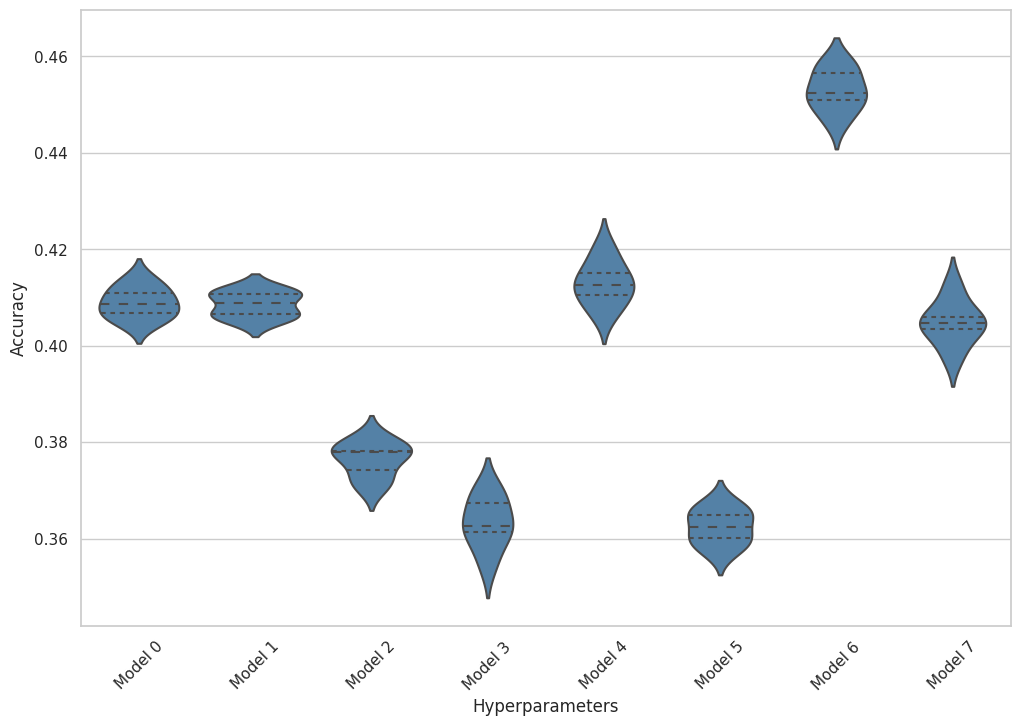

In [59]:
model_analysis('../results/dt_tuning.json', 'dt')

Mean accuracies: [0.603013552798973, 0.6043204970996415, 0.6045996564453879, 0.593644089559624, 0.5337846750421381, 0.6201959344408715, 0.5751986107160186, 0.6196526106238159]
Model : Average Accuracy [Min, Max]
Model 0: 0.6030 [0.5971, 0.6075]
Model 1: 0.6043 [0.5994, 0.6094]
Model 2: 0.6046 [0.6012, 0.6090]
Model 3: 0.5936 [0.5889, 0.6006]
Model 4: 0.5338 [0.5260, 0.5390]
Model 5: 0.6202 [0.6144, 0.6241]
Model 6: 0.5752 [0.5687, 0.5816]
Model 7: 0.6197 [0.6142, 0.6267]
Best model index: 5
Best model hyperparameters: {'n_estimators': 100, 'criterion': 'gini', 'min_impurity_decrease': 0.0, 'max_depth': 1000}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '1', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.6858304344516057}]


/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/paolo/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


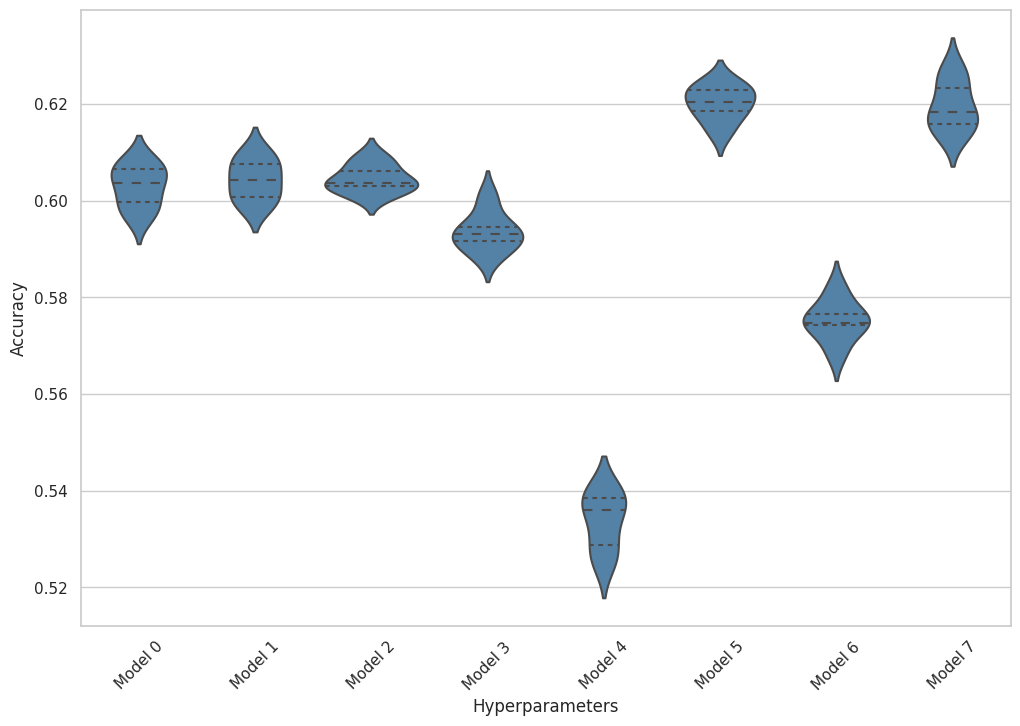

In [60]:
model_analysis('../results/rf_tuning.json', 'rf')

Mean accuracies: [0.6032631365116493, 0.6216499416164011, 0.6050695174129431, 0.5626570579480216, 0.5739503492129868, 0.6101949277771167, 0.5604688609814178, 0.6023087729946471]
Model : Average Accuracy [Min, Max]
Model 0: 0.6033 [0.5991, 0.6097]
Model 1: 0.6216 [0.6120, 0.6311]
Model 2: 0.6051 [0.6019, 0.6077]
Model 3: 0.5627 [0.5375, 0.5765]
Model 4: 0.5740 [0.5570, 0.5826]
Model 5: 0.6102 [0.6038, 0.6169]
Model 6: 0.5605 [0.5466, 0.5666]
Model 7: 0.6023 [0.5972, 0.6136]
Best model index: 1
Best model hyperparameters: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Wilcoxon test results: [{'model': '0', 'p_value': 0.03125}, {'model': '2', 'p_value': 0.03125}, {'model': '3', 'p_value': 0.03125}, {'model': '4', 'p_value': 0.03125}, {'model': '5', 'p_value': 0.09375}, {'model': '6', 'p_value': 0.03125}, {'model': '7', 'p_value': 0.03125}]


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


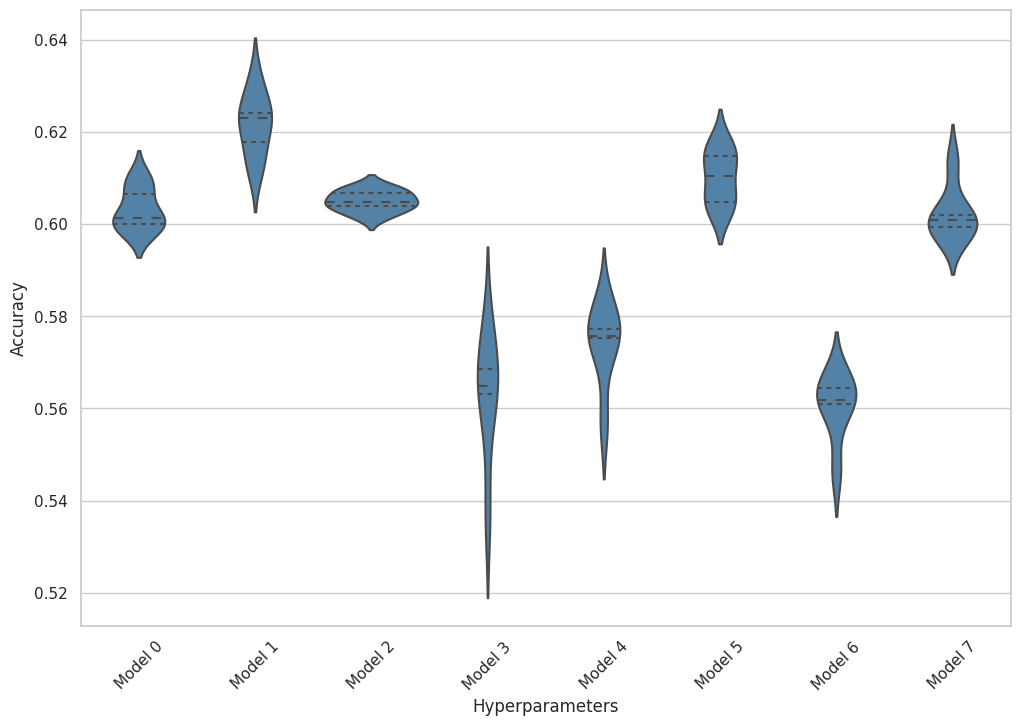

In [61]:
model_analysis('../results/nn_tuning.json', 'nn')

In [62]:
def best_analysis():
    """
    Funzione principale che carica i dati, esegue il test di Wilcoxon e plotta i risultati.

    Parameters:
        json_file (str): Percorso al file JSON contenente i dati dei modelli.
    """
    try:
        json_file = '../results/best.json'
        # Carica i dati dal file JSON
        with open(json_file, 'r') as file:
            model_data = json.load(file)

        name_map = {
            'rf': 'Random Forest',
            'dt': 'Decision Tree',
            'nn': 'Neural Network'
        }

        # Calcola la media delle accuracies per ciascun modello
        mean_accuracies = [np.mean(d['accuracies']) for d in model_data]

        # Stampa le accuratezze medie
        print(f"Mean accuracies: {mean_accuracies}")

        print(f"Model : Average Accuracy [Min, Max]")
        for i, d in enumerate(model_data):
            print(f"{name_map[d['model_name']]}: {mean_accuracies[i]:.4f} [{min(d['accuracies']):.4f}, {max(d['accuracies']):.4f}]")


        # Trova l'indice del modello con la migliore accuracy media
        best_index = np.argmax(mean_accuracies)
        best_data = model_data[best_index]

        # Esegui il test di Wilcoxon tra il miglior modello e gli altri
        wilcoxon_results = wilcoxon_test(best_index, model_data)

        # Stampa i risultati
        print(f"\nBest model name: {best_data['model_name']}")
        print(f"Best model hyperparameters: {best_data['hyperparams']}")
        print(f"Best model mean accuracy: {mean_accuracies[best_index]}")
        print("\nWilcoxon test results:")
        for result in wilcoxon_results:
            print(f"Model: {result['model']}, p-value: {result['p_value']}")

        # Crea e mostra il violin plot per il confronto delle accuracy
        plotter = Plotter()
        x_labels = [name_map[d['model_name']] for d in model_data]

        plotter.plot_bar_accuracy_comparison(model_data, title='', x_label='Models', x_ticks_labels=x_labels, label_rotation=0)

    except FileNotFoundError:
        print(f"File not found: {json_file}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON file: {json_file}")
    except Exception as e:
        print(f"An error occurred: {e}")

Mean accuracies: [0.45299817719681884, 0.6201959344408715, 0.6216499416164011]
Model : Average Accuracy [Min, Max]
Decision Tree: 0.4530 [0.4468, 0.4579]
Random Forest: 0.6202 [0.6144, 0.6241]
Neural Network: 0.6216 [0.6120, 0.6311]

Best model name: nn
Best model hyperparameters: {'hidden_size': 64, 'epochs': 5, 'lr': 0.001}
Best model mean accuracy: 0.6216499416164011

Wilcoxon test results:
Model: dt, p-value: 0.03125
Model: rf, p-value: 0.84375


/home/paolo/anaconda3/envs/DMML/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


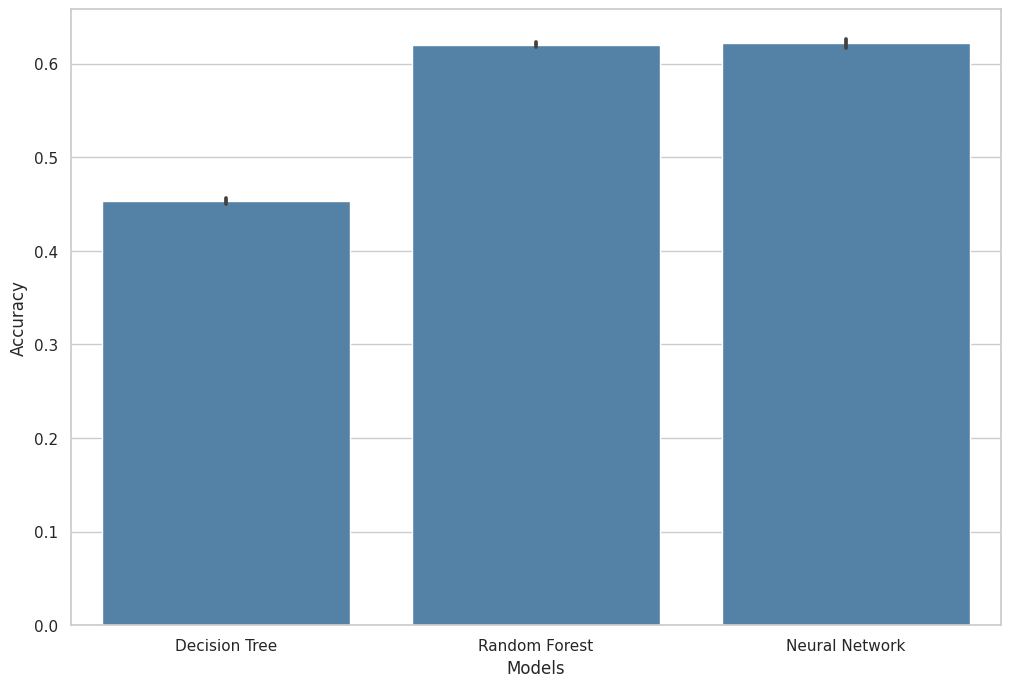

In [63]:
best_analysis()